# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [3]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [4]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [5]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

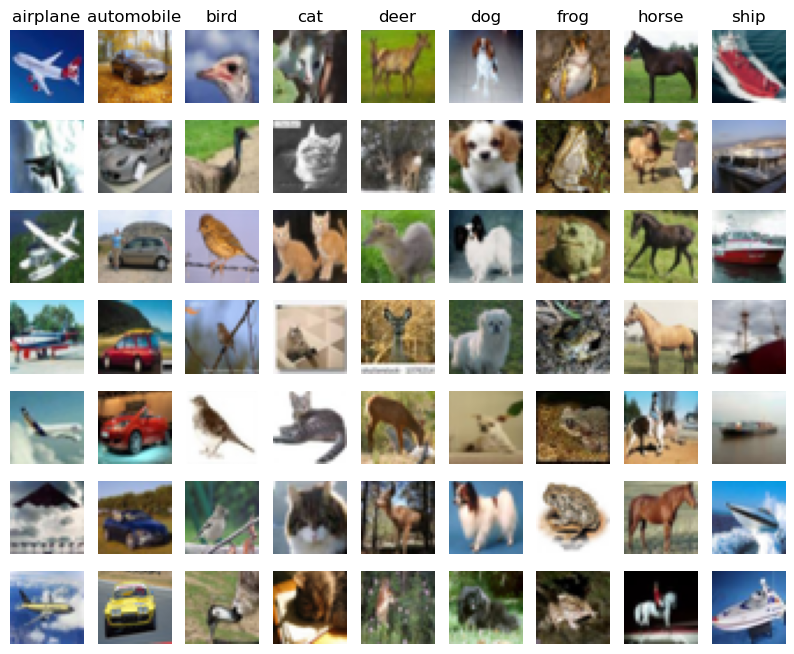

In [6]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [7]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [8]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [9]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302542
Validate Acc: 0.100
Epoch Average Loss: 2.302361
Epoch Average Loss: 2.302148
Epoch Average Loss: 2.301858
Validate Acc: 0.108
Epoch Average Loss: 2.301435
Epoch Average Loss: 2.300822
Epoch Average Loss: 2.299971
Validate Acc: 0.104
Epoch Average Loss: 2.298802
Epoch Average Loss: 2.297294
Epoch Average Loss: 2.295478
Validate Acc: 0.100
Epoch Average Loss: 2.293310
Epoch Average Loss: 2.290770
Epoch Average Loss: 2.287664
Validate Acc: 0.084
Epoch Average Loss: 2.283799
Epoch Average Loss: 2.278735
Epoch Average Loss: 2.272542
Validate Acc: 0.096
Epoch Average Loss: 2.265473
Epoch Average Loss: 2.258108
Epoch Average Loss: 2.250493
Validate Acc: 0.104
Epoch Average Loss: 2.242832
Epoch Average Loss: 2.235370
Epoch Average Loss: 2.228328
Validate Acc: 0.112
Epoch Average Loss: 2.221834
Epoch Average Loss: 2.215466
Epoch Average Loss: 2.209791
Validate Acc: 0.124
Epoch Average Loss: 2.204559
Epoch Average Loss: 2.199866
Epoch Average Loss: 2.195371
Validate

In [20]:
print(validation_accuracy)

[0.1, 0.108, 0.104, 0.1, 0.084, 0.096, 0.104, 0.112, 0.124, 0.136, 0.14, 0.144, 0.14, 0.144, 0.148, 0.148, 0.152, 0.148, 0.152, 0.156, 0.168, 0.172, 0.172, 0.164, 0.172, 0.192, 0.232, 0.22, 0.228, 0.236, 0.248, 0.256, 0.24, 0.26, 0.272, 0.26, 0.272, 0.272, 0.26, 0.268, 0.26, 0.272, 0.3, 0.3, 0.3, 0.304, 0.304, 0.32, 0.312, 0.304, 0.308, 0.308, 0.3, 0.312, 0.284, 0.308, 0.308, 0.308, 0.308, 0.312, 0.312, 0.316, 0.312, 0.308, 0.316, 0.32, 0.308]


### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.344
Validation acc:  0.316


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

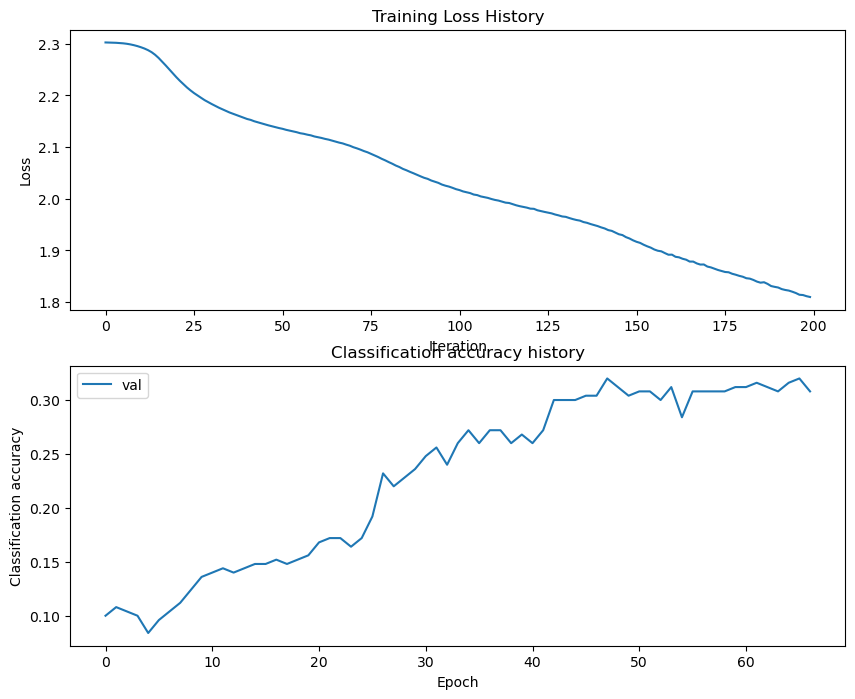

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


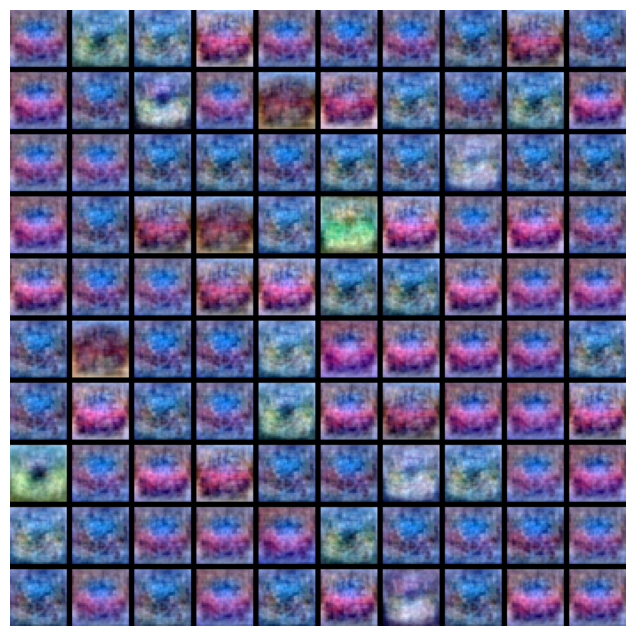

In [11]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

- From the training error plot shown above, the model is underfitting, which fails to converge at the end. Therefore, I increase the learning rate and the size of hidden layers. 
- Learning Rate - As mentioned in what's wrong, the learning rate is too low as the loss is decreasing linearly. Therefore, I have increased the learning rates, trying the learning rate of 0.02 and 0.06. 
- Hidden Size - Since the model has low capacity, I have tried with a hidden sizes of 100 and 200. 
- Epochs - Increasing the epochs should also help in achieving better training accuracy. Therefore, I have tried with epochs 200 and 500. 
- Weight decay - I have tried with weight_decay of 0.015 and 0.0025 as weight_decay of 0.01 was used intially.
- Based on that, my best set of hyperparameters are: batch size = 200, learning rate = 0.02, weight decay = 0.0025, epoch size = 500, hidden layer size = 200.

In [12]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################

pass


In [21]:
## my code

input_size = 3072
#hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

lrs = [0.02, 0.06]
weight_decays = [0.015 ,0.0025]
epochs = [200, 500]
hidden_sizes = [100, 200]

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

def tune_hyperparameter(lr, weight_decay, epoch, hidden_size):
    # Initialize the dataset with the dataloader class
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = init_model()
    optim = SGD(net, lr=lr, weight_decay=weight_decay)
    loss_func = CrossEntropyLoss()
    epoch = epoch  # (Hyper-parameter)
    batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)

    # Initialize the trainer class by passing the above modules
    trainer = Trainer(
        dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
    )

    # Call the trainer function we have already implemented for you. This trains the model for the given
    # hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
    train_error, validation_accuracy = trainer.train()
    
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
    # print("Training acc: ", acc)
    out_val = net.predict(x_val)
    acc = get_classification_accuracy(out_val, y_val)
    # print("Validation acc: ", acc)
    
    return acc

# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]

best_net_hyperparams = [0, 0, 0, 0]
best_validation_accuracy = 0

for lr in lrs:
    for weight_decay in weight_decays:
        for epoch in epochs:
            for hidden_size in hidden_sizes:
                validation_accuracy = tune_hyperparameter(lr, weight_decay, epoch, hidden_size)
                if validation_accuracy > best_validation_accuracy:
                    best_validation_accuracy = validation_accuracy
                    best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
                    print("Best Validation Accuracy:", best_validation_accuracy)
                    print("Best Net Hyperparams:", best_net_hyperparams)

Epoch Average Loss: 2.302476
Validate Acc: 0.084
Epoch Average Loss: 2.302072
Epoch Average Loss: 2.301226
Epoch Average Loss: 2.299594
Validate Acc: 0.092
Epoch Average Loss: 2.296717
Epoch Average Loss: 2.292538
Epoch Average Loss: 2.286427
Validate Acc: 0.088
Epoch Average Loss: 2.276523
Epoch Average Loss: 2.262982
Epoch Average Loss: 2.248431
Validate Acc: 0.104
Epoch Average Loss: 2.233421
Epoch Average Loss: 2.220261
Epoch Average Loss: 2.208889
Validate Acc: 0.124
Epoch Average Loss: 2.199165
Epoch Average Loss: 2.191009
Epoch Average Loss: 2.183960
Validate Acc: 0.132
Epoch Average Loss: 2.177392
Epoch Average Loss: 2.170687
Epoch Average Loss: 2.165814
Validate Acc: 0.140
Epoch Average Loss: 2.160386
Epoch Average Loss: 2.155339
Epoch Average Loss: 2.151433
Validate Acc: 0.144
Epoch Average Loss: 2.147268
Epoch Average Loss: 2.143563
Epoch Average Loss: 2.140621
Validate Acc: 0.156
Epoch Average Loss: 2.136664
Epoch Average Loss: 2.134081
Epoch Average Loss: 2.130199
Validate

Epoch Average Loss: 2.126968
Epoch Average Loss: 2.123017
Epoch Average Loss: 2.120246
Validate Acc: 0.160
Epoch Average Loss: 2.116094
Epoch Average Loss: 2.112907
Epoch Average Loss: 2.108894
Validate Acc: 0.184
Epoch Average Loss: 2.103404
Epoch Average Loss: 2.099728
Epoch Average Loss: 2.093504
Validate Acc: 0.180
Epoch Average Loss: 2.087693
Epoch Average Loss: 2.082135
Epoch Average Loss: 2.075128
Validate Acc: 0.228
Epoch Average Loss: 2.068881
Epoch Average Loss: 2.063861
Epoch Average Loss: 2.056821
Validate Acc: 0.244
Epoch Average Loss: 2.051584
Epoch Average Loss: 2.047762
Epoch Average Loss: 2.042338
Validate Acc: 0.252
Epoch Average Loss: 2.037185
Epoch Average Loss: 2.032434
Epoch Average Loss: 2.026772
Validate Acc: 0.244
Epoch Average Loss: 2.023134
Epoch Average Loss: 2.018591
Epoch Average Loss: 2.015507
Validate Acc: 0.264
Epoch Average Loss: 2.011801
Epoch Average Loss: 2.008171
Epoch Average Loss: 2.004586
Validate Acc: 0.272
Epoch Average Loss: 2.000626
Epoch Av

Epoch Average Loss: 1.994979
Epoch Average Loss: 1.992353
Epoch Average Loss: 1.985851
Validate Acc: 0.288
Epoch Average Loss: 1.982068
Epoch Average Loss: 1.976417
Epoch Average Loss: 1.972886
Validate Acc: 0.264
Epoch Average Loss: 1.965804
Epoch Average Loss: 1.961323
Epoch Average Loss: 1.955250
Validate Acc: 0.288
Epoch Average Loss: 1.950829
Epoch Average Loss: 1.944525
Epoch Average Loss: 1.939145
Validate Acc: 0.272
Epoch Average Loss: 1.934313
Epoch Average Loss: 1.930213
Epoch Average Loss: 1.927498
Validate Acc: 0.280
Epoch Average Loss: 1.923669
Epoch Average Loss: 1.922806
Epoch Average Loss: 1.915834
Validate Acc: 0.320
Epoch Average Loss: 1.911463
Epoch Average Loss: 1.905765
Epoch Average Loss: 1.907099
Validate Acc: 0.280
Epoch Average Loss: 1.901160
Epoch Average Loss: 1.897972
Epoch Average Loss: 1.892318
Validate Acc: 0.304
Epoch Average Loss: 1.890762
Epoch Average Loss: 1.885697
Epoch Average Loss: 1.883872
Validate Acc: 0.288
Epoch Average Loss: 1.882921
Epoch Av

Epoch Average Loss: 1.529826
Epoch Average Loss: 1.538242
Epoch Average Loss: 1.540694
Validate Acc: 0.388
Epoch Average Loss: 1.534179
Epoch Average Loss: 1.527961
Epoch Average Loss: 1.525325
Validate Acc: 0.404
Epoch Average Loss: 1.532017
Epoch Average Loss: 1.525890
Epoch Average Loss: 1.528591
Validate Acc: 0.408
Epoch Average Loss: 1.530074
Epoch Average Loss: 1.522340
Epoch Average Loss: 1.524462
Validate Acc: 0.400
Epoch Average Loss: 1.526318
Epoch Average Loss: 1.518010
Epoch Average Loss: 1.533690
Validate Acc: 0.420
Epoch Average Loss: 1.513460
Epoch Average Loss: 1.510818
Epoch Average Loss: 1.510300
Validate Acc: 0.404
Epoch Average Loss: 1.517197
Epoch Average Loss: 1.520949
Epoch Average Loss: 1.525945
Validate Acc: 0.408
Epoch Average Loss: 1.523908
Epoch Average Loss: 1.518074
Epoch Average Loss: 1.520627
Validate Acc: 0.408
Epoch Average Loss: 1.529743
Epoch Average Loss: 1.530196
Epoch Average Loss: 1.518669
Validate Acc: 0.368
Epoch Average Loss: 1.502534
Epoch Av

Epoch Average Loss: 2.168629
Epoch Average Loss: 2.163041
Validate Acc: 0.144
Epoch Average Loss: 2.158016
Epoch Average Loss: 2.153981
Epoch Average Loss: 2.149104
Validate Acc: 0.144
Epoch Average Loss: 2.145234
Epoch Average Loss: 2.142565
Epoch Average Loss: 2.138803
Validate Acc: 0.156
Epoch Average Loss: 2.135263
Epoch Average Loss: 2.132575
Epoch Average Loss: 2.129758
Validate Acc: 0.156
Epoch Average Loss: 2.126891
Epoch Average Loss: 2.123125
Epoch Average Loss: 2.120119
Validate Acc: 0.156
Epoch Average Loss: 2.116164
Epoch Average Loss: 2.112760
Epoch Average Loss: 2.109437
Validate Acc: 0.160
Epoch Average Loss: 2.104353
Epoch Average Loss: 2.099734
Epoch Average Loss: 2.094020
Validate Acc: 0.204
Epoch Average Loss: 2.089246
Epoch Average Loss: 2.082548
Epoch Average Loss: 2.076603
Validate Acc: 0.220
Epoch Average Loss: 2.070583
Epoch Average Loss: 2.064869
Epoch Average Loss: 2.057494
Validate Acc: 0.220
Epoch Average Loss: 2.052972
Epoch Average Loss: 2.046923
Epoch Av

Epoch Average Loss: 1.551367
Epoch Average Loss: 1.552787
Epoch Average Loss: 1.556624
Validate Acc: 0.424
Epoch Average Loss: 1.543330
Epoch Average Loss: 1.545793
Epoch Average Loss: 1.547502
Validate Acc: 0.408
Epoch Average Loss: 1.545282
Epoch Average Loss: 1.549839
Epoch Average Loss: 1.549437
Validate Acc: 0.392
Epoch Average Loss: 1.550993
Epoch Average Loss: 1.533105
Epoch Average Loss: 1.531598
Validate Acc: 0.424
Epoch Average Loss: 1.540045
Epoch Average Loss: 1.560114
Epoch Average Loss: 1.527307
Validate Acc: 0.400
Epoch Average Loss: 1.527333
Epoch Average Loss: 1.529054
Epoch Average Loss: 1.534234
Validate Acc: 0.408
Epoch Average Loss: 1.526737
Epoch Average Loss: 1.541587
Epoch Average Loss: 1.534942
Validate Acc: 0.412
Epoch Average Loss: 1.520693
Epoch Average Loss: 1.522911
Epoch Average Loss: 1.525668
Validate Acc: 0.420
Epoch Average Loss: 1.522799
Epoch Average Loss: 1.515971
Epoch Average Loss: 1.537674
Validate Acc: 0.392
Epoch Average Loss: 1.512960
Epoch Av

Epoch Average Loss: 1.362077
Epoch Average Loss: 1.380839
Epoch Average Loss: 1.374995
Validate Acc: 0.404
Epoch Average Loss: 1.367018
Epoch Average Loss: 1.361877
Epoch Average Loss: 1.355750
Validate Acc: 0.432
Epoch Average Loss: 1.363600
Epoch Average Loss: 1.362958
Epoch Average Loss: 1.378310
Validate Acc: 0.460
Epoch Average Loss: 1.375100
Epoch Average Loss: 1.363270
Epoch Average Loss: 1.345786
Validate Acc: 0.424
Epoch Average Loss: 1.354986
Epoch Average Loss: 1.355098
Epoch Average Loss: 1.367302
Validate Acc: 0.404
Epoch Average Loss: 1.353983
Epoch Average Loss: 1.353563
Epoch Average Loss: 1.348860
Validate Acc: 0.428
Epoch Average Loss: 1.354722
Epoch Average Loss: 1.363416
Epoch Average Loss: 1.339500
Validate Acc: 0.444
Epoch Average Loss: 1.342458
Best Validation Accuracy: 0.444
Best Net Hyperparams: [0.02, 0.015, 500, 200]
Epoch Average Loss: 2.302482
Validate Acc: 0.084
Epoch Average Loss: 2.302061
Epoch Average Loss: 2.301206
Epoch Average Loss: 2.299501
Validate

Epoch Average Loss: 2.282399
Validate Acc: 0.096
Epoch Average Loss: 2.270669
Epoch Average Loss: 2.255910
Epoch Average Loss: 2.240423
Validate Acc: 0.116
Epoch Average Loss: 2.226197
Epoch Average Loss: 2.213688
Epoch Average Loss: 2.202594
Validate Acc: 0.124
Epoch Average Loss: 2.192863
Epoch Average Loss: 2.184592
Epoch Average Loss: 2.177646
Validate Acc: 0.140
Epoch Average Loss: 2.171367
Epoch Average Loss: 2.164718
Epoch Average Loss: 2.159378
Validate Acc: 0.144
Epoch Average Loss: 2.154236
Epoch Average Loss: 2.149545
Epoch Average Loss: 2.145827
Validate Acc: 0.148
Epoch Average Loss: 2.141576
Epoch Average Loss: 2.137457
Epoch Average Loss: 2.134145
Validate Acc: 0.160
Epoch Average Loss: 2.130404
Epoch Average Loss: 2.127300
Epoch Average Loss: 2.123583
Validate Acc: 0.156
Epoch Average Loss: 2.120504
Epoch Average Loss: 2.116511
Epoch Average Loss: 2.112619
Validate Acc: 0.160
Epoch Average Loss: 2.109312
Epoch Average Loss: 2.103358
Epoch Average Loss: 2.099805
Validate

Epoch Average Loss: 2.091907
Validate Acc: 0.188
Epoch Average Loss: 2.086992
Epoch Average Loss: 2.082462
Epoch Average Loss: 2.074749
Validate Acc: 0.232
Epoch Average Loss: 2.068203
Epoch Average Loss: 2.061336
Epoch Average Loss: 2.054611
Validate Acc: 0.228
Epoch Average Loss: 2.048595
Epoch Average Loss: 2.043361
Epoch Average Loss: 2.035980
Validate Acc: 0.252
Epoch Average Loss: 2.031783
Epoch Average Loss: 2.025263
Epoch Average Loss: 2.022215
Validate Acc: 0.248
Epoch Average Loss: 2.016568
Epoch Average Loss: 2.011029
Epoch Average Loss: 2.007023
Validate Acc: 0.280
Epoch Average Loss: 2.003967
Epoch Average Loss: 2.000546
Epoch Average Loss: 1.996121
Validate Acc: 0.272
Epoch Average Loss: 1.992430
Epoch Average Loss: 1.988390
Epoch Average Loss: 1.984592
Validate Acc: 0.276
Epoch Average Loss: 1.980127
Epoch Average Loss: 1.977193
Epoch Average Loss: 1.973792
Validate Acc: 0.276
Epoch Average Loss: 1.971195
Epoch Average Loss: 1.965568
Epoch Average Loss: 1.961215
Validate

Epoch Average Loss: 1.434752
Epoch Average Loss: 1.442694
Validate Acc: 0.424
Epoch Average Loss: 1.448464
Epoch Average Loss: 1.414312
Epoch Average Loss: 1.419575
Validate Acc: 0.412
Epoch Average Loss: 1.398488
Epoch Average Loss: 1.423970
Epoch Average Loss: 1.431626
Validate Acc: 0.400
Epoch Average Loss: 1.396115
Epoch Average Loss: 1.403118
Epoch Average Loss: 1.394935
Validate Acc: 0.400
Epoch Average Loss: 1.409703
Epoch Average Loss: 1.402157
Epoch Average Loss: 1.431168
Validate Acc: 0.416
Epoch Average Loss: 1.411445
Epoch Average Loss: 1.412695
Epoch Average Loss: 1.409862
Validate Acc: 0.392
Epoch Average Loss: 1.424884
Epoch Average Loss: 1.392005
Epoch Average Loss: 1.389815
Validate Acc: 0.404
Epoch Average Loss: 1.383541
Epoch Average Loss: 1.403659
Epoch Average Loss: 1.392362
Validate Acc: 0.408
Epoch Average Loss: 1.401077
Epoch Average Loss: 1.391643
Epoch Average Loss: 1.370950
Validate Acc: 0.420
Epoch Average Loss: 1.385262
Epoch Average Loss: 1.376763
Epoch Av

Epoch Average Loss: 1.054403
Epoch Average Loss: 1.021256
Epoch Average Loss: 1.054218
Validate Acc: 0.448
Epoch Average Loss: 1.044351
Epoch Average Loss: 2.302389
Validate Acc: 0.092
Epoch Average Loss: 2.301633
Epoch Average Loss: 2.300289
Epoch Average Loss: 2.297948
Validate Acc: 0.100
Epoch Average Loss: 2.294542
Epoch Average Loss: 2.289749
Epoch Average Loss: 2.282086
Validate Acc: 0.096
Epoch Average Loss: 2.270041
Epoch Average Loss: 2.255027
Epoch Average Loss: 2.239843
Validate Acc: 0.112
Epoch Average Loss: 2.225387
Epoch Average Loss: 2.212650
Epoch Average Loss: 2.202272
Validate Acc: 0.132
Epoch Average Loss: 2.193198
Epoch Average Loss: 2.184135
Epoch Average Loss: 2.177286
Validate Acc: 0.136
Epoch Average Loss: 2.170789
Epoch Average Loss: 2.164496
Epoch Average Loss: 2.159031
Validate Acc: 0.140
Epoch Average Loss: 2.154134
Epoch Average Loss: 2.149606
Epoch Average Loss: 2.145239
Validate Acc: 0.144
Epoch Average Loss: 2.140931
Epoch Average Loss: 2.137270
Epoch Av

Epoch Average Loss: 1.454321
Epoch Average Loss: 1.434241
Epoch Average Loss: 1.431104
Validate Acc: 0.412
Epoch Average Loss: 1.493287
Epoch Average Loss: 1.437069
Epoch Average Loss: 1.446077
Validate Acc: 0.404
Epoch Average Loss: 1.433579
Epoch Average Loss: 1.434036
Epoch Average Loss: 1.419788
Validate Acc: 0.400
Epoch Average Loss: 1.434262
Epoch Average Loss: 1.452460
Epoch Average Loss: 1.426330
Validate Acc: 0.420
Epoch Average Loss: 1.430195
Epoch Average Loss: 1.434513
Epoch Average Loss: 1.425760
Validate Acc: 0.380
Epoch Average Loss: 1.417683
Epoch Average Loss: 1.419263
Epoch Average Loss: 1.442584
Validate Acc: 0.428
Epoch Average Loss: 1.410745
Epoch Average Loss: 1.425141
Epoch Average Loss: 1.401086
Validate Acc: 0.424
Epoch Average Loss: 1.406989
Epoch Average Loss: 1.395409
Epoch Average Loss: 1.393240
Validate Acc: 0.416
Epoch Average Loss: 1.380557
Epoch Average Loss: 1.407836
Epoch Average Loss: 1.387470
Validate Acc: 0.424
Epoch Average Loss: 1.401312
Epoch Av

Epoch Average Loss: 1.013283
Epoch Average Loss: 1.025440
Epoch Average Loss: 1.075063
Validate Acc: 0.384
Epoch Average Loss: 1.023530
Epoch Average Loss: 0.995767
Epoch Average Loss: 0.996802
Validate Acc: 0.428
Epoch Average Loss: 1.012283
Epoch Average Loss: 1.026855
Epoch Average Loss: 1.016986
Validate Acc: 0.456
Epoch Average Loss: 1.013333
Epoch Average Loss: 0.988553
Epoch Average Loss: 1.011878
Validate Acc: 0.440
Epoch Average Loss: 1.010203
Epoch Average Loss: 1.001097
Epoch Average Loss: 1.025985
Validate Acc: 0.428
Epoch Average Loss: 1.005524
Epoch Average Loss: 0.970219
Epoch Average Loss: 1.002404
Validate Acc: 0.360
Epoch Average Loss: 1.011376
Epoch Average Loss: 1.008189
Epoch Average Loss: 1.009883
Validate Acc: 0.408
Epoch Average Loss: 1.009074
Epoch Average Loss: 0.956100
Epoch Average Loss: 0.988501
Validate Acc: 0.448
Epoch Average Loss: 1.008881
Epoch Average Loss: 1.004106
Epoch Average Loss: 0.994172
Validate Acc: 0.440
Epoch Average Loss: 0.986058
Epoch Av

Epoch Average Loss: 1.550320
Epoch Average Loss: 1.552205
Validate Acc: 0.384
Epoch Average Loss: 1.515121
Epoch Average Loss: 1.569601
Epoch Average Loss: 1.503964
Validate Acc: 0.412
Epoch Average Loss: 1.567825
Epoch Average Loss: 1.511547
Epoch Average Loss: 1.552256
Validate Acc: 0.352
Epoch Average Loss: 1.509706
Epoch Average Loss: 1.527279
Epoch Average Loss: 1.550006
Validate Acc: 0.388
Epoch Average Loss: 1.515404
Epoch Average Loss: 1.520020
Epoch Average Loss: 1.570852
Validate Acc: 0.388
Epoch Average Loss: 1.513856
Epoch Average Loss: 2.301760
Validate Acc: 0.084
Epoch Average Loss: 2.295346
Epoch Average Loss: 2.271449
Epoch Average Loss: 2.230776
Validate Acc: 0.116
Epoch Average Loss: 2.197813
Epoch Average Loss: 2.180731
Epoch Average Loss: 2.166496
Validate Acc: 0.144
Epoch Average Loss: 2.150765
Epoch Average Loss: 2.141055
Epoch Average Loss: 2.131194
Validate Acc: 0.156
Epoch Average Loss: 2.128748
Epoch Average Loss: 2.117420
Epoch Average Loss: 2.096947
Validate

Epoch Average Loss: 2.062116
Validate Acc: 0.220
Epoch Average Loss: 2.049037
Epoch Average Loss: 2.033554
Epoch Average Loss: 2.028077
Validate Acc: 0.260
Epoch Average Loss: 2.013636
Epoch Average Loss: 2.037058
Epoch Average Loss: 1.979966
Validate Acc: 0.240
Epoch Average Loss: 1.998690
Epoch Average Loss: 1.992195
Epoch Average Loss: 1.975277
Validate Acc: 0.264
Epoch Average Loss: 1.970080
Epoch Average Loss: 1.972249
Epoch Average Loss: 1.948731
Validate Acc: 0.264
Epoch Average Loss: 1.975949
Epoch Average Loss: 1.926631
Epoch Average Loss: 1.929615
Validate Acc: 0.288
Epoch Average Loss: 1.925765
Epoch Average Loss: 1.900465
Epoch Average Loss: 1.936853
Validate Acc: 0.288
Epoch Average Loss: 1.882202
Epoch Average Loss: 1.884552
Epoch Average Loss: 1.883707
Validate Acc: 0.288
Epoch Average Loss: 1.895818
Epoch Average Loss: 1.864546
Epoch Average Loss: 1.846913
Validate Acc: 0.328
Epoch Average Loss: 1.882464
Epoch Average Loss: 1.841849
Epoch Average Loss: 1.829111
Validate

Epoch Average Loss: 1.500005
Epoch Average Loss: 1.512064
Validate Acc: 0.412
Epoch Average Loss: 1.490978
Epoch Average Loss: 1.487234
Epoch Average Loss: 1.492154
Validate Acc: 0.388
Epoch Average Loss: 1.495822
Epoch Average Loss: 1.551559
Epoch Average Loss: 1.507073
Validate Acc: 0.368
Epoch Average Loss: 1.514609
Epoch Average Loss: 1.503457
Epoch Average Loss: 1.484021
Validate Acc: 0.388
Epoch Average Loss: 1.487327
Epoch Average Loss: 1.507941
Epoch Average Loss: 1.498321
Validate Acc: 0.380
Epoch Average Loss: 1.504647
Epoch Average Loss: 1.468449
Epoch Average Loss: 1.511477
Validate Acc: 0.412
Epoch Average Loss: 1.507155
Epoch Average Loss: 1.507299
Epoch Average Loss: 1.495524
Validate Acc: 0.416
Epoch Average Loss: 1.490433
Epoch Average Loss: 1.516872
Epoch Average Loss: 1.498323
Validate Acc: 0.372
Epoch Average Loss: 1.516938
Epoch Average Loss: 1.487964
Epoch Average Loss: 1.527802
Validate Acc: 0.388
Epoch Average Loss: 1.481982
Epoch Average Loss: 1.478347
Epoch Av

Epoch Average Loss: 1.494884
Epoch Average Loss: 1.460963
Epoch Average Loss: 1.414102
Validate Acc: 0.408
Epoch Average Loss: 1.461878
Epoch Average Loss: 1.426086
Epoch Average Loss: 1.449317
Validate Acc: 0.408
Epoch Average Loss: 1.429933
Epoch Average Loss: 1.418742
Epoch Average Loss: 1.442209
Validate Acc: 0.356
Epoch Average Loss: 1.401639
Epoch Average Loss: 1.465745
Epoch Average Loss: 1.418461
Validate Acc: 0.404
Epoch Average Loss: 1.416859
Epoch Average Loss: 1.467252
Epoch Average Loss: 1.423622
Validate Acc: 0.424
Epoch Average Loss: 1.419870
Epoch Average Loss: 1.465760
Epoch Average Loss: 1.433311
Validate Acc: 0.416
Epoch Average Loss: 1.430734
Epoch Average Loss: 1.445616
Epoch Average Loss: 1.442888
Validate Acc: 0.416
Epoch Average Loss: 1.469282
Epoch Average Loss: 1.419834
Epoch Average Loss: 1.456312
Validate Acc: 0.412
Epoch Average Loss: 1.439032
Epoch Average Loss: 2.301769
Validate Acc: 0.084
Epoch Average Loss: 2.295101
Epoch Average Loss: 2.272226
Epoch Av

Epoch Average Loss: 1.516780
Epoch Average Loss: 1.528649
Epoch Average Loss: 1.515507
Validate Acc: 0.364
Epoch Average Loss: 1.513480
Epoch Average Loss: 1.520357
Epoch Average Loss: 1.511772
Validate Acc: 0.332
Epoch Average Loss: 1.505059
Epoch Average Loss: 1.503654
Epoch Average Loss: 1.502362
Validate Acc: 0.432
Epoch Average Loss: 1.491227
Epoch Average Loss: 1.500624
Epoch Average Loss: 1.481543
Validate Acc: 0.376
Epoch Average Loss: 1.454729
Epoch Average Loss: 1.508609
Epoch Average Loss: 1.479704
Validate Acc: 0.432
Epoch Average Loss: 1.524850
Epoch Average Loss: 1.489536
Epoch Average Loss: 1.508590
Validate Acc: 0.396
Epoch Average Loss: 1.512038
Epoch Average Loss: 1.501329
Epoch Average Loss: 1.456884
Validate Acc: 0.440
Epoch Average Loss: 1.499254
Epoch Average Loss: 1.485777
Epoch Average Loss: 1.506112
Validate Acc: 0.420
Epoch Average Loss: 1.470970
Epoch Average Loss: 1.516247
Epoch Average Loss: 1.503914
Validate Acc: 0.420
Epoch Average Loss: 1.489618
Epoch Av

Epoch Average Loss: 1.427593
Epoch Average Loss: 1.395463
Epoch Average Loss: 1.442446
Validate Acc: 0.436
Epoch Average Loss: 1.431804
Epoch Average Loss: 1.421576
Epoch Average Loss: 1.432964
Validate Acc: 0.372
Epoch Average Loss: 1.411926
Epoch Average Loss: 1.404505
Epoch Average Loss: 1.398782
Validate Acc: 0.376
Epoch Average Loss: 1.417505
Epoch Average Loss: 1.425044
Epoch Average Loss: 1.433500
Validate Acc: 0.432
Epoch Average Loss: 1.404381
Epoch Average Loss: 1.401817
Epoch Average Loss: 1.446824
Validate Acc: 0.392
Epoch Average Loss: 1.439095
Epoch Average Loss: 1.416809
Epoch Average Loss: 1.430585
Validate Acc: 0.424
Epoch Average Loss: 1.411244
Epoch Average Loss: 1.479036
Epoch Average Loss: 1.433456
Validate Acc: 0.440
Epoch Average Loss: 1.405360
Epoch Average Loss: 1.405414
Epoch Average Loss: 1.426315
Validate Acc: 0.452
Epoch Average Loss: 1.415890
Epoch Average Loss: 1.448305
Epoch Average Loss: 1.394283
Validate Acc: 0.412
Epoch Average Loss: 1.404464
Epoch Av

Epoch Average Loss: 1.336400
Epoch Average Loss: 1.268663
Epoch Average Loss: 1.323723
Validate Acc: 0.412
Epoch Average Loss: 1.254909
Epoch Average Loss: 1.282583
Epoch Average Loss: 1.257609
Validate Acc: 0.412
Epoch Average Loss: 1.293875
Epoch Average Loss: 1.252730
Epoch Average Loss: 1.225386
Validate Acc: 0.424
Epoch Average Loss: 1.304322
Epoch Average Loss: 1.277822
Epoch Average Loss: 1.219063
Validate Acc: 0.432
Epoch Average Loss: 1.265278
Epoch Average Loss: 1.218711
Epoch Average Loss: 1.292089
Validate Acc: 0.424
Epoch Average Loss: 1.225313
Epoch Average Loss: 1.254874
Epoch Average Loss: 1.208473
Validate Acc: 0.400
Epoch Average Loss: 1.232347
Epoch Average Loss: 1.211188
Epoch Average Loss: 1.198004
Validate Acc: 0.408
Epoch Average Loss: 1.217755
Epoch Average Loss: 1.227334
Epoch Average Loss: 1.176177
Validate Acc: 0.424
Epoch Average Loss: 1.222823
Epoch Average Loss: 1.210172
Epoch Average Loss: 1.206513
Validate Acc: 0.448
Epoch Average Loss: 1.230735
Epoch Av

Epoch Average Loss: 1.114991
Epoch Average Loss: 1.074821
Epoch Average Loss: 1.092852
Validate Acc: 0.408
Epoch Average Loss: 1.126693
Epoch Average Loss: 2.302169
Validate Acc: 0.104
Epoch Average Loss: 2.297460
Epoch Average Loss: 2.277973
Epoch Average Loss: 2.237049
Validate Acc: 0.124
Epoch Average Loss: 2.200799
Epoch Average Loss: 2.177016
Epoch Average Loss: 2.162169
Validate Acc: 0.152
Epoch Average Loss: 2.150927
Epoch Average Loss: 2.141417
Epoch Average Loss: 2.132308
Validate Acc: 0.152
Epoch Average Loss: 2.124745
Epoch Average Loss: 2.110925
Epoch Average Loss: 2.095837
Validate Acc: 0.196
Epoch Average Loss: 2.083535
Epoch Average Loss: 2.063765
Epoch Average Loss: 2.041221
Validate Acc: 0.252
Epoch Average Loss: 2.033916
Epoch Average Loss: 2.025778
Epoch Average Loss: 2.026111
Validate Acc: 0.256
Epoch Average Loss: 2.005578
Epoch Average Loss: 1.995704
Epoch Average Loss: 1.992556
Validate Acc: 0.284
Epoch Average Loss: 1.967947
Epoch Average Loss: 1.965748
Epoch Av

Epoch Average Loss: 1.159218
Epoch Average Loss: 1.088283
Epoch Average Loss: 1.228741
Validate Acc: 0.420
Epoch Average Loss: 1.153720
Epoch Average Loss: 1.112307
Epoch Average Loss: 1.076635
Validate Acc: 0.432
Epoch Average Loss: 1.086813
Epoch Average Loss: 1.084066
Epoch Average Loss: 1.125203
Validate Acc: 0.412
Epoch Average Loss: 1.091996
Epoch Average Loss: 1.105973
Epoch Average Loss: 1.104463
Validate Acc: 0.424
Epoch Average Loss: 1.094658
Epoch Average Loss: 1.064561
Epoch Average Loss: 1.135966
Validate Acc: 0.428
Epoch Average Loss: 1.047950
Epoch Average Loss: 1.053159
Epoch Average Loss: 1.102203
Validate Acc: 0.420
Epoch Average Loss: 1.045038
Epoch Average Loss: 1.072333
Epoch Average Loss: 1.084371
Validate Acc: 0.428
Epoch Average Loss: 1.063174
Epoch Average Loss: 1.060986
Epoch Average Loss: 1.050359
Validate Acc: 0.396
Epoch Average Loss: 1.037315
Epoch Average Loss: 1.034367
Epoch Average Loss: 1.045875
Validate Acc: 0.384
Epoch Average Loss: 1.038019
Epoch Av

Epoch Average Loss: 0.760905
Epoch Average Loss: 0.730656
Epoch Average Loss: 0.813739
Validate Acc: 0.448
Epoch Average Loss: 0.705420
Epoch Average Loss: 0.741130
Epoch Average Loss: 0.735121
Validate Acc: 0.448
Epoch Average Loss: 0.689861
Epoch Average Loss: 0.720221
Epoch Average Loss: 0.786825
Validate Acc: 0.464
Epoch Average Loss: 0.800751
Epoch Average Loss: 1.043927
Epoch Average Loss: 0.784982
Validate Acc: 0.452
Epoch Average Loss: 0.737011
Epoch Average Loss: 0.746739
Epoch Average Loss: 0.765629
Validate Acc: 0.452
Epoch Average Loss: 0.717651
Epoch Average Loss: 0.758893
Epoch Average Loss: 0.689472
Validate Acc: 0.380
Epoch Average Loss: 0.728489
Epoch Average Loss: 0.810353
Epoch Average Loss: 0.766251
Validate Acc: 0.456
Epoch Average Loss: 0.735369
Epoch Average Loss: 0.707530
Epoch Average Loss: 0.682113
Validate Acc: 0.404
Epoch Average Loss: 0.727044
Epoch Average Loss: 0.715909
Epoch Average Loss: 0.721954
Validate Acc: 0.404
Epoch Average Loss: 0.833374
Epoch Av

Epoch Average Loss: 1.197877
Epoch Average Loss: 1.156449
Epoch Average Loss: 1.219379
Validate Acc: 0.396
Epoch Average Loss: 1.184793
Epoch Average Loss: 1.196662
Epoch Average Loss: 1.161715
Validate Acc: 0.448
Epoch Average Loss: 1.171159
Epoch Average Loss: 1.113752
Epoch Average Loss: 1.145362
Validate Acc: 0.440
Epoch Average Loss: 1.212501
Epoch Average Loss: 1.170114
Epoch Average Loss: 1.168198
Validate Acc: 0.440
Epoch Average Loss: 1.125867
Epoch Average Loss: 1.178434
Epoch Average Loss: 1.108126
Validate Acc: 0.436
Epoch Average Loss: 1.150259
Epoch Average Loss: 1.115011
Epoch Average Loss: 1.142563
Validate Acc: 0.448
Epoch Average Loss: 1.079797
Epoch Average Loss: 1.120840
Epoch Average Loss: 1.167975
Validate Acc: 0.424
Epoch Average Loss: 1.083467
Epoch Average Loss: 1.076487
Epoch Average Loss: 1.088808
Validate Acc: 0.428
Epoch Average Loss: 1.075079
Epoch Average Loss: 1.084734
Epoch Average Loss: 1.158982
Validate Acc: 0.412
Epoch Average Loss: 1.093320
Epoch Av

Epoch Average Loss: 0.567751
Epoch Average Loss: 0.648896
Epoch Average Loss: 0.625611
Validate Acc: 0.452
Epoch Average Loss: 0.645400
Epoch Average Loss: 0.624063
Epoch Average Loss: 0.640466
Validate Acc: 0.452
Epoch Average Loss: 0.669446
Epoch Average Loss: 0.614728
Epoch Average Loss: 0.594762
Validate Acc: 0.432
Epoch Average Loss: 0.587378
Epoch Average Loss: 0.560731
Epoch Average Loss: 0.728285
Validate Acc: 0.464
Epoch Average Loss: 0.586297
Epoch Average Loss: 0.696926
Epoch Average Loss: 0.616417
Validate Acc: 0.388
Epoch Average Loss: 0.636201
Epoch Average Loss: 0.844991
Epoch Average Loss: 0.689912
Validate Acc: 0.440
Epoch Average Loss: 0.643191
Epoch Average Loss: 0.833560
Epoch Average Loss: 0.688324
Validate Acc: 0.396
Epoch Average Loss: 0.645119
Epoch Average Loss: 0.747936
Epoch Average Loss: 0.684341
Validate Acc: 0.404
Epoch Average Loss: 0.747897
Epoch Average Loss: 0.658562
Epoch Average Loss: 0.587864
Validate Acc: 0.452
Epoch Average Loss: 0.655097
Epoch Av

### Set 1 
#### Hyperparams: [0.02, 0.015, 200, 100]
#### Validation Accuracy: 0.436

### Set 2
#### Hyperparams: [0.02, 0.015, 500, 100]
#### Validation Accuracy: 0.44

### Set 3
#### Hyperparams: [0.02, 0.015, 500, 200]
#### Validation Accuracy: 0.444

### Set 4
#### Hyperparams: [0.06, 0.0025, 200, 200]
#### Validation Accuracy: 0.444

### Set 5 - The best Hyperparams I chose
#### Best Net Hyperparams: [0.02, 0.0025, 500, 200]
#### Best Validation Accuracy: 0.484

In [15]:
# running on Best Net Hyperparams found from above cell
input_size = 3072
num_classes = 10  # Output

# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]

# Best Validation Accuracy: 0.484
# Best Net Hyperparams: [0.02, 0.0025, 500, 200]
    
lr = 0.02
weight_decay = 0.0025
epochs = 500
hidden_sizes = 200

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
best_net = init_model()
optim = SGD(best_net, lr=lr, weight_decay=weight_decay)
loss_func = CrossEntropyLoss()
epoch = epoch  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)

# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, best_net, loss_func, epoch, batch_size, validate_interval=3
)

# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()

out_train = best_net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
# print("Training acc: ", acc)
out_val = best_net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
# print("Validation acc: ", acc)

Epoch Average Loss: 2.302491
Validate Acc: 0.100
Epoch Average Loss: 2.302079
Epoch Average Loss: 2.301235
Epoch Average Loss: 2.299586
Validate Acc: 0.096
Epoch Average Loss: 2.296762
Epoch Average Loss: 2.292483
Epoch Average Loss: 2.286236
Validate Acc: 0.088
Epoch Average Loss: 2.276298
Epoch Average Loss: 2.262528
Epoch Average Loss: 2.247209
Validate Acc: 0.100
Epoch Average Loss: 2.232745
Epoch Average Loss: 2.218903
Epoch Average Loss: 2.207044
Validate Acc: 0.124
Epoch Average Loss: 2.197255
Epoch Average Loss: 2.188473
Epoch Average Loss: 2.180959
Validate Acc: 0.136
Epoch Average Loss: 2.173752
Epoch Average Loss: 2.167770
Epoch Average Loss: 2.162453
Validate Acc: 0.132
Epoch Average Loss: 2.156890
Epoch Average Loss: 2.152169
Epoch Average Loss: 2.147849
Validate Acc: 0.148
Epoch Average Loss: 2.143310
Epoch Average Loss: 2.139797
Epoch Average Loss: 2.135767
Validate Acc: 0.140
Epoch Average Loss: 2.132608
Epoch Average Loss: 2.129175
Epoch Average Loss: 2.126317
Validate

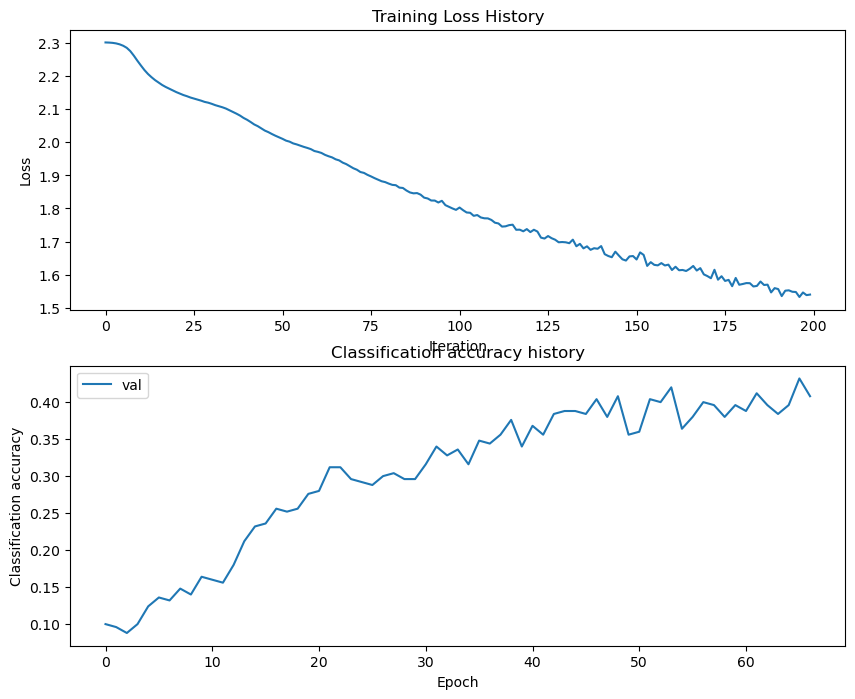

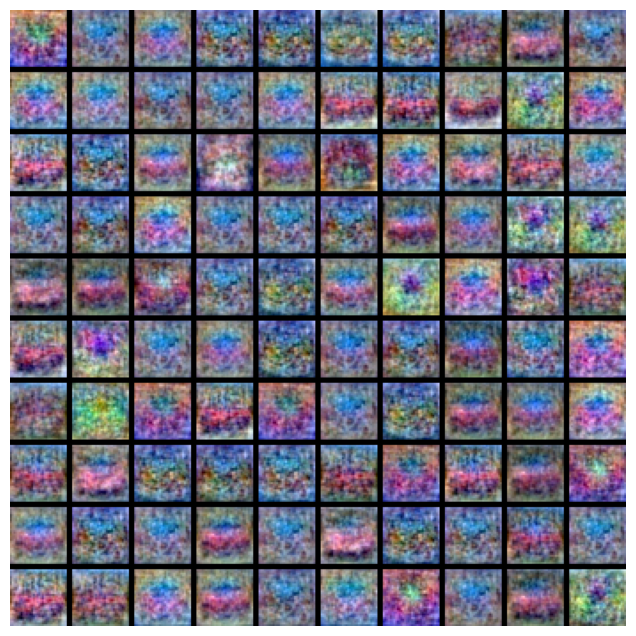

In [16]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()

# TODO: visualize the weights of the best network (5%)
def show_net_weights(best_net):
    W1 = best_net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(best_net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [17]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)


Test accuracy:  0.37


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer: 1 (Train on a larger dataset) and 3 (Increase the regularization strength)

#### Your Explanation:

1. Train on a larger dataset: As the test accuracy is less than the training accuracy, the model is overfitting on the training data. To prevent overfitting of the model on the training data, one effective strategy is to increase the size of the training dataset. By feeding the model with more data, the weights become more generalized, which can lead to improved accuracy on new data during testing.

2. Add more hidden units: If the validation accuracy is close to the training accuracy, adding more hidden units may help to improve the model's performance. However, it's important to be aware of the point where the testing and validation accuracy begin to decrease, indicating that the model is overfitting on the training data. In such cases, it may be necessary to use dropout to remove some neurons, rather than adding more hidden units.

3. Increase the regularization strength: Increasing the regularization strength, or weight decay, can be an effective way to prevent overfitting by penalizing the weights with high magnitudes. By doing so, the model is encouraged to learn more generalized patterns that can be applied to new data during testing.